<a href="https://colab.research.google.com/github/shullaw/maths/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Survey of Statistics with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./CardioGoodFitness.csv')
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [3]:
income = df['Income']
income.head()

0    29562
1    31836
2    30699
3    32973
4    35247
Name: Income, dtype: int64

In [4]:
sorted_income = income.sort_values().reset_index(drop=True)
sorted_income.head()

0    29562
1    30699
2    31836
3    31836
4    32973
Name: Income, dtype: int64

 ## Mean, Median, and Mode

In [6]:
def calc_mean(data: pd.Series):
  
  num_elements = len(data)
  print('Number of elements: ', num_elements)

  weight_sum = data.sum()
  print('Sum: ', weight_sum)

  mean_val = weight_sum / num_elements

  print('Mean: ', mean_val)

  return mean_val

In [8]:
def calc_median(data: pd.Series):  # requires a sorted series

  num_elements = len(data)

  if (num_elements % 2 == 0):
    return (data[(num_elements / 2) - 1] + data[(num_elements / 2)]) / 2

  else:
    return (data[((num_elements + 1) / 2) - 1])

In [9]:
calc_mean(df['Income'])

Number of elements:  180
Sum:  9669524
Mean:  53719.57777777778


53719.57777777778

In [10]:
income_mean = df['Income'].mean()

income_mean

53719.57777777778

In [11]:
calc_median(df['Income'])

45480.0

In [12]:
calc_median(sorted_income)

50596.5

In [14]:
income_median = df['Income'].median()  # doesn't have to be sorted
income_median

50596.5

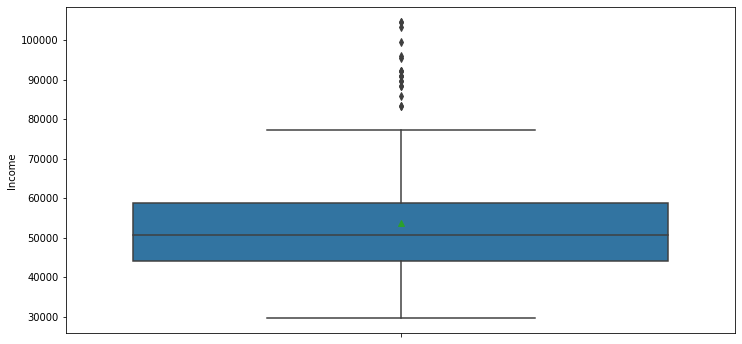

In [16]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, y='Income', showmeans=True)

plt.show()

Center line inside box is median.  Green delta is the mean.  Box represents middle 50% of values.  The two whiskers extending from the box represent 1.5 times the IQR beyond the box.  The black plots at the top are the outliers in the distribution.

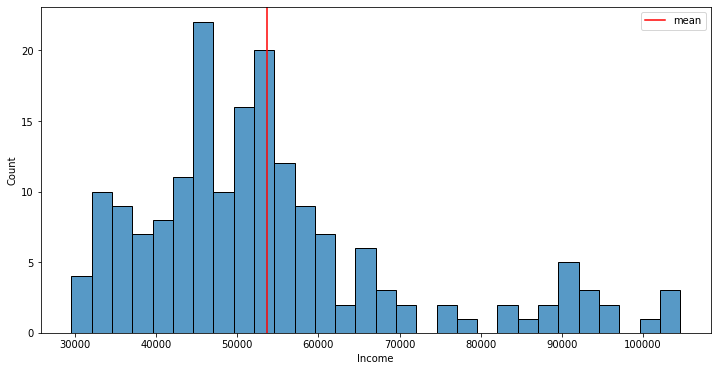

In [17]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df['Income'], bins=30)

plt.axvline(income_mean, color='r', label='mean')

plt.legend()
plt.show()

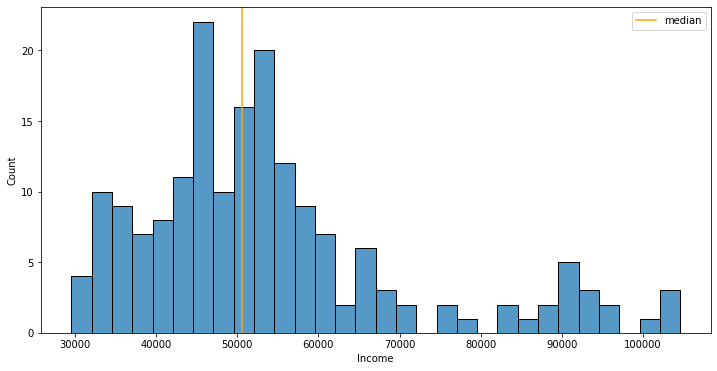

In [19]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df['Income'], bins=30)

plt.axvline(income_median, color='orange', label='median')

plt.legend()
plt.show()

In [25]:
income_mode = df['Income'].mode().values[0]
income_mode

45480

In [22]:
age_mode = df['Age'].mode()
age_mode

0    25
dtype: int64

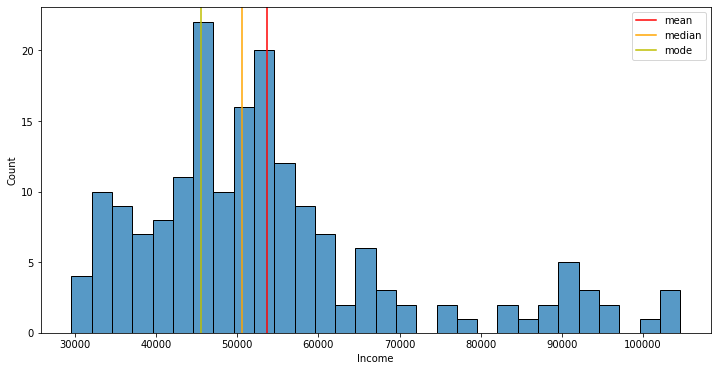

In [26]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df['Income'], bins=30)

plt.axvline(income_mean, color='r', label='mean')
plt.axvline(income_median, color='orange', label='median')
plt.axvline(income_mode, color='y', label='mode')

plt.legend()
plt.show()

The mean being larger than the median is conveyed by the fact that this histogram is right skewed.  The mode also is much smaller than both the mean and median.

In [33]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode().values[0]

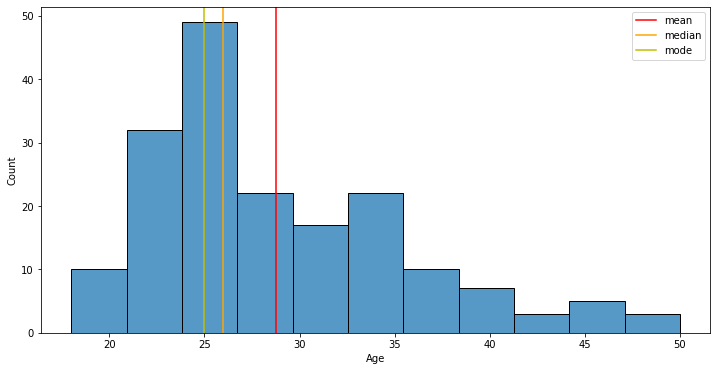

In [36]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df['Age'])

plt.axvline(age_mean, color='r', label='mean')
plt.axvline(age_median, color='orange', label='median')
plt.axvline(age_mode, color='y', label='mode')

plt.legend()
plt.show()

In [37]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Variance and Standard Deviation

- Measuring dispersion

In [40]:
df.shape

(180, 9)

In [41]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [42]:
df.drop(['Product', 'Gender', 'MaritalStatus'], axis=1, inplace=True)

In [43]:
df.shape

(180, 6)

$$ S^2 = \frac{\sum(x_i - \bar{x})}{n - 1} $$

In [50]:
def calc_variance(data: pd.Series):

  sq_diffs = 0
  avg = sum(data) / len(data)

  for n in data:
    sq_diffs += (n - avg)**2

  return (sq_diffs / (len(data) - 1))

In [51]:
calc_variance(df['Usage'])

1.1767846058348868

In [52]:
df['Usage'].var()

1.1767846058348868

In [53]:
calc_variance(df['Income'])

272470624.1447548

In [54]:
df['Income'].var()

272470624.1447548

To get variance in the same scale as the original data use standard deviation.

$$ \sigma = \sqrt\frac{\sum (x_i - \mu )^2}{N} $$

In [55]:
df.std()

Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

In [56]:
std_usage = (calc_variance(df['Usage']))**.5
std_usage

1.0847970343962445

In [57]:
df['Usage'].std()

1.0847970343962445

In [58]:
std_education = (calc_variance(df['Income']))**.5
std_education

16506.68422623862

In [59]:
df['Income'].std()

16506.68422623862

In [60]:
miles_mean = df['Miles'].mean()

miles_std = df['Miles'].std()

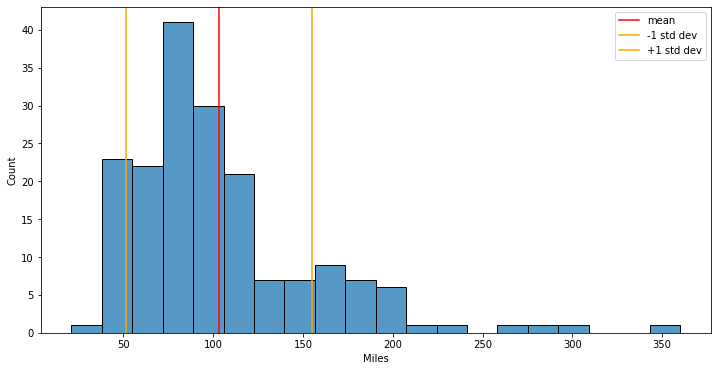

In [61]:
plt.figure(figsize=(12, 6))

sns.histplot(df['Miles'], bins=20)

plt.axvline(miles_mean, color='r', label='mean')
plt.axvline(miles_mean - miles_std, color='orange', label='-1 std dev')
plt.axvline(miles_mean + miles_std, color='orange', label='+1 std dev')

plt.legend()
plt.show()


In [62]:
df.quantile(.25)  # the 25th percentile

Age             24.00
Education       14.00
Usage            3.00
Fitness          3.00
Income       44058.75
Miles           66.00
Name: 0.25, dtype: float64

In [63]:
df.quantile(.5)  # median

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
Name: 0.5, dtype: float64

In [64]:
df.median()

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [65]:
df.quantile(.75)

Age             33.00
Education       16.00
Usage            4.00
Fitness          4.00
Income       58668.00
Miles          114.75
Name: 0.75, dtype: float64

## Probability Sampling and Sampling Techniques

In [66]:
import numpy as np
import random

In [68]:
df = pd.read_csv('./bestsellers with categories.csv')
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [69]:
df.shape

(550, 7)

In [70]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [72]:
simple_random_sample1 = df.sample(n=10)
simple_random_sample1

,Name,Author,User Rating,Reviews,Price,Year,Genre
158,Harry Potter Coloring Book,Scholastic,4.7,3564,9,2015,Non Fiction
38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
202,Killing the Rising Sun: How America Vanquished...,Bill O'Reilly,4.8,8916,6,2016,Non Fiction
451,The Pout-Pout Fish,Deborah Diesen,4.8,9784,5,2017,Fiction
207,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13,2018,Fiction
238,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2012,Fiction
352,The Boys in the Boat: Nine Americans and Their...,Daniel James Brown,4.8,23358,12,2015,Non Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
439,The Official SAT Study Guide,The College Board,4.4,1201,40,2010,Non Fiction
491,The Wonky Donkey,Craig Smith,4.8,30183,4,2019,Fiction


In [73]:
simple_random_sample2 = df.sample(n=10)
simple_random_sample2

,Name,Author,User Rating,Reviews,Price,Year,Genre
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
185,Instant Pot Pressure Cooker Cookbook: 500 Ever...,Jennifer Smith,4.4,7396,13,2018,Non Fiction
379,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2018,Non Fiction
509,To Kill a Mockingbird,Harper Lee,4.8,26234,7,2019,Fiction
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction
68,"Delivering Happiness: A Path to Profits, Passi...",Tony Hsieh,4.6,1651,15,2010,Non Fiction
162,Heaven is for Real: A Little Boy's Astounding ...,Todd Burpo,4.7,15779,10,2012,Non Fiction
175,"Hyperbole and a Half: Unfortunate Situations, ...",Allie Brosh,4.7,4896,17,2013,Non Fiction
39,"Broke: The Plan to Restore Our Trust, Truth an...",Glenn Beck,4.5,471,8,2010,Non Fiction


In [74]:
simple_random_sample3 = df.sample(n=250, replace='False')  # False is default
simple_random_sample3.shape


(250, 7)

In [75]:
df['User Rating'].sample(n=5, random_state=42)  # seed

195    4.6
79     4.7
480    4.9
109    4.2
522    4.8
Name: User Rating, dtype: float64

In [76]:
df['User Rating'].sample(n=5, random_state=42)

195    4.6
79     4.7
480    4.9
109    4.2
522    4.8
Name: User Rating, dtype: float64

In [77]:
df['User Rating'].sample(n=12, random_state=42)

195    4.6
79     4.7
480    4.9
109    4.2
522    4.8
532    4.4
84     4.9
368    4.7
132    3.6
364    4.0
184    4.4
10     4.6
Name: User Rating, dtype: float64

In [78]:
df.groupby('Genre')

In [79]:
df.groupby('Genre').mean()

,User Rating,Reviews,Price,Year
Genre,,,,
Fiction,4.648333,15683.791667,10.850000,2013.925000
Non Fiction,4.595161,9065.145161,14.841935,2014.058065


In [81]:
df.groupby('Genre').max()  # string columns are returned alphanumerically

,Name,Author,User Rating,Reviews,Price,Year
Genre,,,,,,
Fiction,Wrecking Ball (Diary of a Wimpy Kid Book 14),Wizards RPG Team,4.9,87841,82,2019
Non Fiction,You Are a Badass: How to Stop Doubting Your Gr...,Zhi Gang Sha,4.9,61133,105,2019


In [82]:
srs1 = df.groupby('Genre').apply(lambda x: x.sample(8))
srs1

Name  \
Genre                                                                
Fiction     119  Game of Thrones Boxed Set: A Game of Thrones/A...   
            489                   The Wonderful Things You Will Be   
            72       Diary of a Wimpy Kid: The Last Straw (Book 3)   
            224                                   Love You Forever   
            452                                 The Pout-Pout Fish   
            253              Old School (Diary of a Wimpy Kid #10)   
            473                       The Twilight Saga Collection   
            393  The Goldfinch: A Novel (Pulitzer Prize for Fic...   
Non Fiction 148  Grain Brain: The Surprising Truth about Wheat,...   
            526                                      What Happened   
            430                                      The Love Dare   
            27                 Autobiography of Mark Twain, Vol. 1   
            441                       The Official SAT Study Guide   
            11   A Patriot's History of the United States: From...   
            257  Option B: Facing Adversity, Building Resilienc...   
            169              How to Win Friends & Influence People   

                                 Author  User Rating  Reviews  Price  Year  \
Genre                                                                        
Fiction     119      George R.R. Martin          4.6     5594      5  2012   
            489   Emily Winfield Martin          4.9     8842     10  2019   
            72              Jeff Kinney          4.8     3837     15  2009   
            224           Robert Munsch          4.8    18613      5  2015   
            452          Deborah Diesen          4.8     9784      5  2018   
            253             Jeff Kinney          4.8     6169      7  2015   
            473         Stephenie Meyer          4.7     3801     82  2009   
            393             Donna Tartt          3.9    33844     20  2014   
Non Fiction 148     David Perlmutter MD          4.6     5972     10  2014   
            526  Hillary Rodham Clinton          4.6     5492     18  2017   
            430        Stephen Kendrick          4.8     1655     13  2009   
            27               Mark Twain          4.2      491     14  2010   
            441       The College Board          4.4     1201     40  2012   
            11         Larry Schweikart          4.6      460      2  2010   
            257         Sheryl Sandberg          4.5     1831      9  2017   
            169           Dale Carnegie          4.7    25001     11  2017   

                       Genre  
Genre                         
Fiction     119      Fiction  
            489      Fiction  
            72       Fiction  
            224      Fiction  
            452      Fiction  
            253      Fiction  
            473      Fiction  
            393      Fiction  
Non Fiction 148  Non Fiction  
            526  Non Fiction  
            430  Non Fiction  
            27   Non Fiction  
            441  Non Fiction  
            11   Non Fiction  
            257  Non Fiction  
            169  Non Fiction

In [83]:
srs1 = df.groupby('Genre', group_keys=False).apply(lambda x: x.sample(8))
srs1

,Name,Author,User Rating,Reviews,Price,Year,Genre
535,Where the Wild Things Are,Maurice Sendak,4.8,9967,13,2009,Fiction
404,The Help,Kathryn Stockett,4.8,13871,8,2011,Fiction
38,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
349,The Book with No Pictures,B. J. Novak,4.8,8081,8,2014,Fiction
145,Goodnight Moon,Margaret Wise Brown,4.8,8837,5,2019,Fiction
481,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
418,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2009,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction


In [84]:
def stratified_sample(df, col, n_samples):

  n = min(n_samples, df[col].value_counts().min())

  df_groupby = df.groupby(col).apply(lambda x: x.sample(n))

  df_groupby.index = df_groupby.index.droplevel(0)

  return df_groupby

In [85]:
col = ['Genre']

In [86]:
n_samples = 4

In [87]:
strat_samp = stratified_sample(df, col, n_samples)

strat_samp

,Name,Author,User Rating,Reviews,Price,Year,Genre
529,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.8,8170,13,2019,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
24,And the Mountains Echoed,Khaled Hosseini,4.3,12159,13,2013,Fiction
347,The Book Thief,Markus Zusak,4.6,23148,6,2013,Fiction
417,The Last Lecture,Randy Pausch,4.7,4028,9,2009,Non Fiction
115,Food Rules: An Eater's Manual,Michael Pollan,4.4,1555,9,2010,Non Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction
495,"Thinking, Fast and Slow",Daniel Kahneman,4.6,11034,19,2012,Non Fiction


## Cluster and Systematic Sampling

In [88]:
df['Year'].unique()

array([2016, 2011, 2018, 2017, 2019, 2014, 2010, 2009, 2015, 2013, 2012])

In [89]:
df['Year'].nunique()

11

In [90]:
df['Year'].value_counts()

2016    50
2011    50
2018    50
2017    50
2019    50
2014    50
2010    50
2009    50
2015    50
2013    50
2012    50
Name: Year, dtype: int64

In [91]:
clusters = np.random.choice(np.arange(2009, 2020), size=4, replace=False)
clusters

array([2015, 2016, 2019, 2014])

In [92]:
cluster_samp = df[df['Year'].isin(clusters)]
cluster_samp.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,4,2016,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
18,Adult Coloring Books: A Coloring Book for Adul...,Coloring Books for Adults,4.5,2426,8,2015,Non Fiction
19,Alexander Hamilton,Ron Chernow,4.8,9198,13,2016,Non Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction


In [93]:
cluster_samp['Year'].value_counts()

2016    50
2019    50
2014    50
2015    50
Name: Year, dtype: int64

In [94]:
total = len(df)
total

550

In [95]:
samples = 25

In [96]:
interval = (total // samples)  # // => integer

interval

22

In [100]:
def systematic_sampling(df, start_index, step):  # assumes no periodic tendencies in data

  indexes = np.arange(start_index, len(df), step=step)

  systematic_sample = df.iloc[indexes]

  return systematic_sample

In [98]:
sys_samp = systematic_sampling(df, 0, interval)

sys_samp

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
44,Can't Hurt Me: Master Your Mind and Defy the Odds,David Goggins,4.8,16244,18,2019,Non Fiction
66,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2018,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
110,First 100 Words,Roger Priddy,4.7,17323,4,2014,Non Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction
176,"I Am Confident, Brave & Beautiful: A Coloring ...",Hopscotch Girls,4.8,9737,7,2019,Non Fiction
198,Killing Lincoln: The Shocking Assassination th...,Bill O'Reilly,4.7,9342,10,2011,Non Fiction


In [99]:
sys_samp.shape

(25, 7)

In [101]:
def systematic_sampling_random_start(df, num_samples):

  start_index = random.randint(0, len(df) - num_samples+1)

  step = (len(df) - start_index) // num_samples

  print('Generating', num_samples, 
        'samples with a start index of', start_index,
        'and an interval of', step)

  indexes = np.arange(start_index, len(df), step=step)

  systematic_sample = df.iloc[indexes]

  return systematic_sample

In [102]:
ssrs = systematic_sampling_random_start(df, 15)

ssrs

Generating 15 samples with a start index of 238 and an interval of 20


,Name,Author,User Rating,Reviews,Price,Year,Genre
238,Mockingjay (The Hunger Games),Suzanne Collins,4.5,26741,8,2012,Fiction
258,Origin: A Novel (Robert Langdon),Dan Brown,4.3,18904,13,2017,Fiction
278,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
298,Shred: The Revolutionary Diet: 6 Weeks 4 Inche...,Ian K. Smith M.D.,4.1,2272,6,2013,Non Fiction
318,The 17 Day Diet: A Doctor's Plan Designed for ...,Mike Moreno,4.3,2314,22,2011,Non Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
378,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2017,Non Fiction
398,The Guernsey Literary and Potato Peel Pie Society,Mary Ann Shaffer,4.7,8587,10,2009,Fiction
418,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2009,Fiction


## Undersampling and Oversampling

-  Addressing imbalanced data

In [104]:
import imblearn
import warnings
warnings.simplefilter('ignore')

In [159]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [106]:
df.shape

(5110, 12)

In [107]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [108]:
mean = df.mean()

mean

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [109]:
df.fillna(mean, inplace=True)

In [110]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [111]:
stroke_count = df['stroke'].value_counts()

stroke_count

0    4861
1     249
Name: stroke, dtype: int64

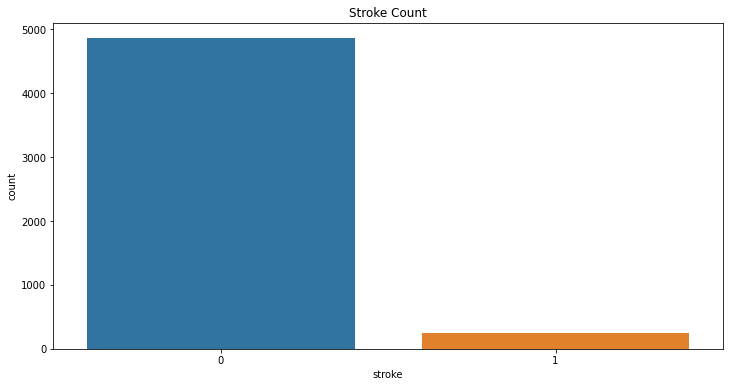

In [112]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='stroke')

plt.title('Stroke Count')

plt.show()

In [114]:
no_stroke_count, yes_stroke_count = df['stroke'].value_counts()

(no_stroke_count, yes_stroke_count)

(4861, 249)

In [115]:
stroke_data_stroke_0 = df[df['stroke'] == 0]

stroke_data_stroke_0.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [116]:
stroke_data_stroke_1 = df[df['stroke'] == 1]

stroke_data_stroke_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [117]:
stroke_data_stroke_0_under = stroke_data_stroke_0.sample(yes_stroke_count)

stroke_data_stroke_0_under

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3296,64742,Male,48.0,0,0,No,Self-employed,Rural,64.18,32.1,never smoked,0
2431,37483,Male,36.0,0,0,Yes,Private,Urban,98.03,22.1,smokes,0
2001,12741,Female,25.0,0,0,Yes,Private,Rural,97.52,45.5,formerly smoked,0
4397,33657,Female,64.0,0,0,Yes,Private,Urban,95.87,19.3,formerly smoked,0
1452,12992,Female,49.0,0,0,Yes,Private,Rural,96.85,35.5,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
743,26235,Male,23.0,0,0,No,Private,Rural,96.78,24.6,smokes,0
1315,17222,Male,55.0,1,0,Yes,Self-employed,Rural,82.81,44.3,never smoked,0
3717,68420,Female,13.0,0,0,No,children,Urban,63.22,18.5,formerly smoked,0
1793,11024,Female,76.0,0,0,Yes,Private,Rural,97.90,31.3,formerly smoked,0


In [118]:
stroke_data_test_under = pd.concat([stroke_data_stroke_0_under, stroke_data_stroke_1])

stroke_data_test_under.shape

(498, 12)

In [122]:
print('Random under-sampling: ')

print(stroke_data_test_under.stroke.value_counts())

print('Num records = ', stroke_data_test_under.shape[0])

Random under-sampling: 
0    249
1    249
Name: stroke, dtype: int64
Num records =  498


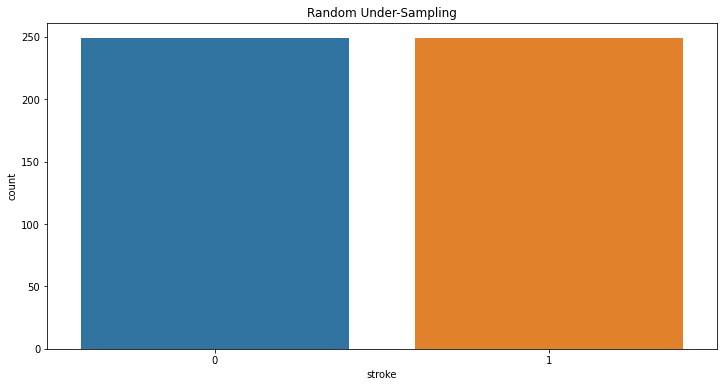

In [123]:
plt.figure(figsize=(12, 6))

sns.countplot(data = stroke_data_test_under, x='stroke')

plt.title('Random Under-Sampling')

plt.show()

In [125]:
df.duplicated().sum()

0

In [126]:
stroke_data_stroke_1.shape

(249, 12)

In [128]:
stroke_data_stroke_1_over = stroke_data_stroke_1.sample(no_stroke_count, replace=True)

In [129]:
stroke_data_stroke_1_over.shape

(4861, 12)

In [130]:
stroke_data_stroke_1_over.duplicated().sum()

4612

In [131]:
stroke_data_test_over = pd.concat([stroke_data_stroke_0, stroke_data_stroke_1_over], axis=0)

stroke_data_test_over

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.000000,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.200000,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.100000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
64,7356,Male,75.0,0,0,Yes,Private,Urban,104.72,28.893237,Unknown,1
200,54695,Male,74.0,0,0,Yes,Private,Urban,167.13,28.893237,Unknown,1
80,57419,Male,59.0,0,0,Yes,Private,Rural,96.16,44.100000,Unknown,1


In [132]:
stroke_data_test_over.shape

(9722, 12)

In [134]:
print('Random over-sampling:')

print(stroke_data_test_over.stroke.value_counts())

Random over-sampling:
0    4861
1    4861
Name: stroke, dtype: int64


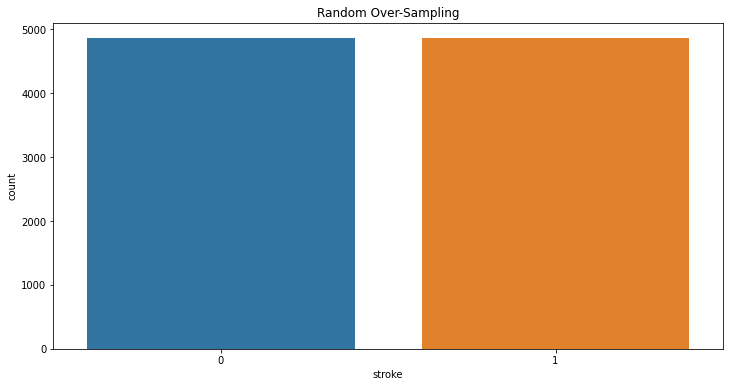

In [135]:
plt.figure(figsize=(12, 6))

sns.countplot(data=stroke_data_test_over, x='stroke')

plt.title('Random Over-Sampling')

plt.show()

## Oversampling with SMOTE

In [136]:
from imblearn.over_sampling import SMOTE

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [172]:
dummy_data = pd.get_dummies(df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

stroke_data = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]

stroke_data.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
6,74.0,1,1,70.09,27.4,1
7,69.0,0,0,94.39,22.8,1
8,59.0,0,0,76.15,NaN,1
9,78.0,0,0,58.57,24.2,1


In [180]:
stroke_data.fillna(mean, inplace=True)

In [164]:
dummy_data.head(10)

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
6,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
7,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
8,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
9,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0


In [181]:
new_stroke_df = pd.concat([stroke_data, dummy_data], axis=1)

new_stroke_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.600000,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.600000,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [182]:
new_stroke_df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [184]:
X = new_stroke_df.drop('stroke', axis=1)

y = new_stroke_df['stroke']

In [185]:
X.shape

(5110, 21)

In [186]:
y.shape

(5110,)

In [187]:
sm = SMOTE(random_state=1)

X_res, y_res = sm.fit_resample(X, y)

In [188]:
X_res.shape

(9722, 21)

In [189]:
y_res.shape

(9722,)

In [190]:
stroke_data_smote_over = pd.concat([pd.DataFrame(X_res),
                                    pd.DataFrame(y_res, columns=['stroke'])],
                                   axis=1)

In [191]:
stroke_data_smote_over

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.000000,0,1,228.690000,36.600000,0,1,0,0,1,...,1,0,0,0,1,0,1,0,0,1
1,61.000000,0,0,202.210000,28.893237,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
2,80.000000,0,1,105.920000,32.500000,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1
3,49.000000,0,0,171.230000,34.400000,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,1
4,79.000000,1,0,174.120000,24.000000,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,38.117138,0,0,101.017762,28.976026,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9718,77.910399,0,0,60.676944,28.893237,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
9719,59.593718,0,0,111.356474,27.721885,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9720,76.097023,0,0,125.444735,30.858214,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [192]:
print('SMOTE over-sampling:')
print(stroke_data_smote_over.stroke.value_counts())

SMOTE over-sampling:
1    4861
0    4861
Name: stroke, dtype: int64


In [193]:
stroke_data_smote_over.duplicated().sum()

0

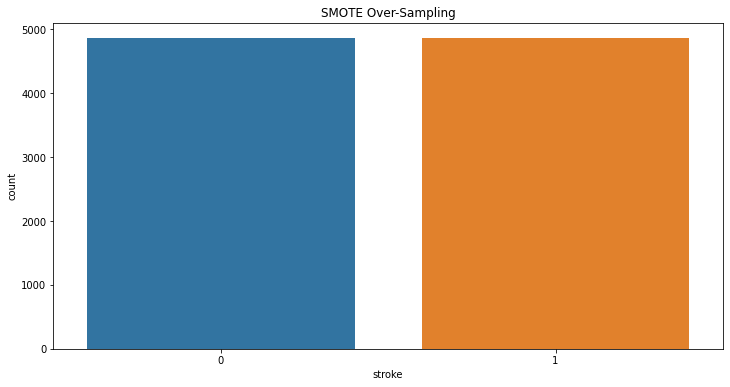

In [194]:
plt.figure(figsize=(12, 6))

sns.countplot(data=stroke_data_smote_over, x='stroke')

plt.title('SMOTE Over-Sampling')

plt.show()